In [39]:
import scanpy as sc
import squidpy as sq
import os
import anndata as ad
import tqdm
import itertools as it
import matplotlib.pyplot as plt
import pandas as pd
import imageio

In [40]:
# get spatial dataset including hires tissue image
img = sq.im.ImageContainer(os.path.expanduser("~/.cache/squidpy/tutorial_data/visium_fluo_crop.tiff"))
adata = sc.read(os.path.expanduser("~/.cache/squidpy/tutorial_data/visium_fluo_crop.h5ad"))


/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [41]:
# segment
sq.im.segment_img(img=img, img_id="image", model_group="watershed", channel_idx=0, thresh=50000)

In [42]:
# define image layer to use for segmentation
features_kwargs = {'segmentation': {'label_img_id': 'segmented_watershed'}}
# calculate segmentation features
sq.im.calculate_image_features(adata, img, key_added='features', features_kwargs=features_kwargs, features='segmentation', size=1, scale=1.0, mask_circle=True)

/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [43]:
# fill nans
adata.obsm['features'].fillna(value=0, inplace=True)

In [44]:
adata.obsm['features']

,segmentation_label,segmentation_area_mean,segmentation_mean_intensity_ch0_mean,segmentation_mean_intensity_ch1_mean,segmentation_mean_intensity_ch2_mean
AAACGAGACGGTTGAT-1,19,76.000000,59703.544408,8144.706426,8864.286037
AAAGGGATGTAGCAAG-1,11,87.545455,62783.660470,4417.449532,9951.237881
AAATGGCATGTCTTGT-1,15,18.333333,53307.557817,12861.079905,7227.249251
AAATGGTCAATGTGCC-1,3,25.666667,52078.912489,3636.221024,9572.248697
AAATTAACGGGTAGCT-1,7,82.000000,57409.973800,18918.132135,9495.213747
...,...,...,...,...,...
TTGTCGTTCAGTTACC-1,26,354.538462,60942.831349,4004.739007,24162.405815
TTGTGGCCCTGACAGT-1,14,33.642857,54622.713562,12749.304533,7457.918016
TTGTTAGCAAATTCGA-1,19,33.421053,54758.576181,32318.710349,7034.915773
TTGTTCAGTGTGCTAC-1,6,39.166667,58520.767103,4406.114993,9279.237263


## Plot and save figures

In [118]:
skimage.transform.resize?

Signature:
skimage.transform.resize(
    image,
    output_shape,
    order=None,
    mode='reflect',
    cval=0,
    clip=True,
    preserve_range=False,
    anti_aliasing=None,
    anti_aliasing_sigma=None,
)
Docstring:
Resize image to match a certain size.

Performs interpolation to up-size or down-size N-dimensional images. Note
that anti-aliasing should be enabled when down-sizing images to avoid
aliasing artifacts. For down-sampling with an integer factor also see
`skimage.transform.downscale_local_mean`.

Parameters
----------
image : ndarray
    Input image.
output_shape : tuple or ndarray
    Size of the generated output image `(rows, cols[, ...][, dim])`. If
    `dim` is not provided, the number of channels is preserved. In case the
    number of input channels does not equal the number of output channels a
    n-dimensional interpolation is applied.

Returns
-------
resized : ndarray
    Resized version of the input.

Other parameters
----------------
order : int, optional
 

In [90]:
import skimage.transform
import skimage.color

In [45]:
sc.settings.dpi = 300

In [119]:
#orig_hires = adata.uns['spatial']['V1_Adult_Mouse_Brain_Coronal_Section_2']['images']['hires']
seg_hires = skimage.transform.resize(img['segmented_watershed']>0, (600,600), order=2)
adata.uns['spatial']['V1_Adult_Mouse_Brain_Coronal_Section_2']['images']['hires'] = skimage.color.gray2rgb(seg_hires)

/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/skimage/transform/_warps.py:176: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  out = warp(image, tform, output_shape=output_shape, order=order,


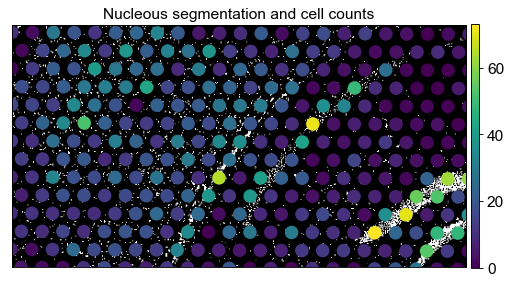

In [120]:
# save ncounts
sc.set_figure_params(facecolor="white", figsize=(8, 4))
fig, ax = plt.subplots(figsize=(8, 4))
sc.pl.spatial(
    sq.pl.extract(adata, 'features'), 
    color=['segmentation_label'], 
    bw=True, 
    title='Nucleous segmentation and cell counts',
    crop_coord=(1000,7000,1000,4200), 
    show=False,
    ax=ax
)
ax.axes.xaxis.label.set_visible(False)
ax.axes.yaxis.label.set_visible(False)

plt.savefig('figures/fluo_ncells.png', dpi=300, bbox_inches='tight')

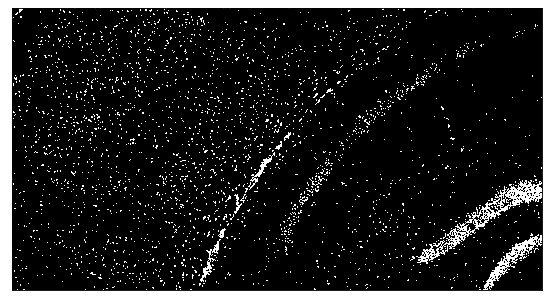

In [121]:
# save segmentation image
a = plt.imshow(img['segmented_watershed'][1000:4200,1000:7000]>0, cmap='gray', interpolation='none')
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.tight_layout()
plt.savefig('figures/fluo_segmentation.png', dpi=300, bbox_inches='tight')

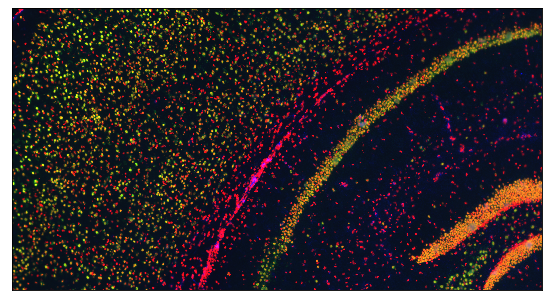

In [116]:
# save fluo image
a = plt.imshow(img['image'][1000:4200,1000:7000]/65536, interpolation='none')
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.tight_layout()
plt.savefig('figures/fluo_image.png', dpi=300, bbox_inches='tight')